# **<center>Instituto Tecnológico y de Estudios Superiores de Occidente</center>**#


<h1><center>Optimización Convexa</center></h1>

<h1><center>Trabajo Final</center></h1>

<center>Prof. Dr. Juan Diego Sánchez</center>




Integrantes:

*   Juan Pablo Acevedo
*   Luis Alfonso Guerrero
*   Alex Medina
*   Angel Wong





**Introducción** 

Los accidentes viales fatales en México fueron uno de las principales causas de muerte en el 2006, esto según datos publicados por el INEGI, y hay un aproximado de alrededor de 11 mil muertes al año por este mismo fenómeno.

La relevancia de identificar los factores determinantes que causan los accidentes viales fatales son vitales para la política pública del país, cuyo objetivo es el salvarguardar el bienestar de sus ciudadanos. El poder identificar estos factores, pueden dar herramientas y estrategias para reducir accidentes y en su defecto disminuir la tasa de mortalidad.

Un caso particular que se han observado en estos últimos años es la implementación de sistemas de vigilancia en calles transitadas y de días festivos los famosos retenes de alcoholemia o los famosos "toritos"; por ejemplo, en Semana Santa del 2022 la Ciudad de México registró e infraccionó a 515 automovolistas por infracciones de transito y así como por aliento alcohólicos.

Contar con esta información puede ser de gran ayuda para poder reducir accidentes viales y evitar que sean fatales, así como mejorar las condiciones viales del país.


**Definicion del problema**

En este trabajo de investigación tiene como objetivo de identificar los factores determinantes para que un accidente vial sea fatal.

Al ser un problema de clasificación, se pretende utilizar un Support Vector Machine Classifier (SVM-C) para clasificar los accidentes fatales y no fatales.

A su vez, se pretende usar distintos Kernels para comparar los resultados a través de métricas de problemas de clasificación y también comparar con otro modelo que no sea SVM y ver su "perfomance".





**Datos**

Los datos se toman de registros administrativos que publica a mediados de cada año por Instituto Nacional de Estadística y Geografía (INEGI), el cual se puede consultar: https://www.inegi.org.mx/programas/accidentes/. Esta base de datos Accidentes de tránsito terrestre en zonas urbanas y suburbanas, también conocido como ATUS registran los accidentes viales del todo el país, con una cobertura geográfica municipal.

Los registros son captados por el INEGI a través de los enlaces municipales de vialidad.




**Exploracion de datos**

La exploración de los datos es una etapa primordial para poder comprender el problema a analizar. Es relevante poder comprender el problema ya que esto permite identifica qué tipo de problema es, ya sea de regresión o de clasificación, así como qué modelo es pertinente utilizar para la predicción.

En la exploración de los datos, logra identificar las características que tienen las variables de este set de datoss, como las medidas de tendencia central para aquellas variables continuas y las frecuencias y datos omitidos para aquellas que son categóricas.

En la exploración de los datos se plantea revisar lo siguiente:

1. Distribución de los datos categóricos y numéricos
2. Correlación de las variables
3. Análisis de componentes principales (PCA)
4. Prueba t-SNE

In [1]:
# Paqueterias
import numpy as np
import pandas as pd
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
# Carga de BD
df = pd.read_csv('accidentes_2020.csv') 
df1=df
df1.head()
describe=df1.describe()
df1.columns
df2=df1.iloc[:,1:-3]
#df2.to_excel('accidentes_2020.1',encoding='utf-8')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.16120522 0.24846418 0.31908674 0.38754038 0.45445742 0.51958727
 0.58355158 0.64599715 0.70611398 0.76108311 0.81363565 0.86449237
 0.90984035 0.94773304 0.9841343  1.        ]
----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.16120522 0.08725896 0.07062256 0.06845364 0.06691704 0.06512985
 0.06396431 0.06244557 0.06011682 0.05496914 0.05255254 0.05085672
 0.04534798 0.0378927  0.03640125 0.0158657 ]


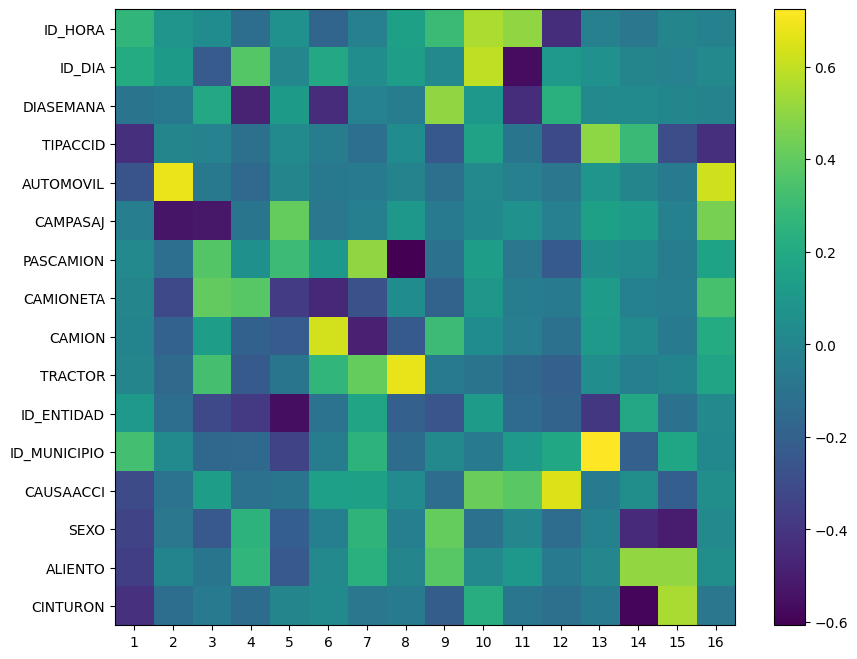

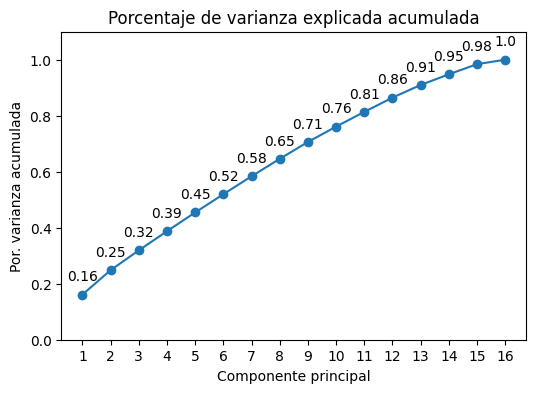

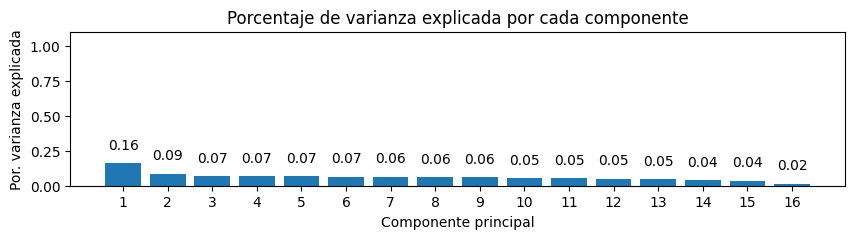

In [3]:
#Exploracion
#Variables numericas

datos=df2.loc[:,['ID_HORA','ID_DIA','DIASEMANA','TIPACCID','AUTOMOVIL','CAMPASAJ','PASCAMION',
            'CAMIONETA','CAMION','TRACTOR','ID_ENTIDAD','ID_MUNICIPIO','CAUSAACCI','SEXO','ALIENTO','CINTURON']]


####Analisi PCA######
pca_pipe = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.decomposition.PCA())
#pca_pipe = make_pipeline( PCA())
pca_pipe.fit(datos)
modelo_pca = pca_pipe.named_steps['pca']
analisis=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns, 
)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.colorbar();

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

"""ds=pd.DataFrame(abs(componentes))
for i in range(37):
    print(max(ds[0:i+1,:]))"""
    
#maxc = ds.max(axis=1)
#print(maxc)

# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

plt.show()

In [4]:
df

,Unnamed: 0,ID_ENTIDAD,ID_MUNICIPIO,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,CAMPASAJ,...,TRACTOR,MOTOCICLET,CAUSAACCI,SEXO,ALIENTO,CINTURON,ID_EDAD,CLASACC,REGION,OTROSV
0,1,1,1,14,30,1,4,9,0,0,...,0,0,2,2,2,3,50,0,0,0
1,2,1,1,15,20,1,4,9,1,0,...,0,0,2,2,2,3,30,0,0,0
2,3,1,1,15,45,1,4,6,1,0,...,0,1,2,2,2,3,40,0,0,0
3,4,1,1,16,25,1,4,6,1,0,...,0,1,2,4,3,3,0,0,0,0
4,5,1,1,20,0,1,4,9,3,0,...,0,0,2,4,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30751,30752,32,56,5,15,26,6,7,1,0,...,0,0,2,4,3,3,0,0,0,0
30752,30753,32,56,10,40,26,6,9,1,1,...,0,0,2,3,2,3,54,0,0,0
30753,30754,32,56,17,25,28,3,13,1,0,...,0,0,2,2,2,3,21,0,0,0
30754,30755,32,56,20,48,28,3,9,1,0,...,0,0,2,2,2,3,49,0,0,0


# Definición del modelo
## Preparacion de los datos

In [5]:
# Modelo SVM C
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

np.random.seed(123)

fatales = df[df['CLASACC'] == 1]
nofatales = df[df['CLASACC'] == 0]

obs, fts = fatales.shape
percent = 50 
n = round(obs * 100 / percent) - obs
n

nofatalessample = nofatales.sample(n)
nofatalessample.shape

dfj = pd.concat([fatales, nofatalessample]).sample(frac=1)
dfj = dfj.drop(['ID_EDAD'], axis=1)

#Separamos la base en train y test
Y = dfj['CLASACC']
Y
X = dfj.drop(['CLASACC', 'Unnamed: 0'], axis=1)
X

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

In [6]:
xtrain.shape 
xtest.shape 
ytrain.shape 
ytest.shape

(124,)

In [7]:
## Modelo SVC con kernel lineal

In [8]:
svc_l = SVC()

param_grid = [
  {'C': [1, 20], 'kernel': ['linear'], 'tol': [1e-4, 1e-6]}
 ]

In [ ]:
grid = GridSearchCV(svc_l, param_grid)
grid.fit(xtrain, ytrain)

In [10]:
grid.best_params_

{'C': 20, 'kernel': 'linear', 'tol': 0.0001}

In [19]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(xtrain.columns)
svmtest = SVC()
svmtest.set_params(**grid.best_params_)
svmtest.fit(xtrain, ytrain)

SVC(C=20, kernel='linear', tol=0.0001)

In [28]:
svmtest.coef_[0]

array([-9.93244045e-03, -1.08315850e-04, -3.95714400e-02,  5.06609663e-03,
       -3.74885577e-03,  7.89767555e-02,  8.64396936e-03, -7.19803473e-01,
       -7.05874087e-01, -2.98039347e-01, -5.40916887e-01, -6.91738501e-01,
       -4.17361822e-01,  1.22753230e+00,  4.67368295e-01,  2.82962688e-01,
        4.27737501e-01,  2.50080962e-01,  1.40254400e+00,  1.34129707e+00])

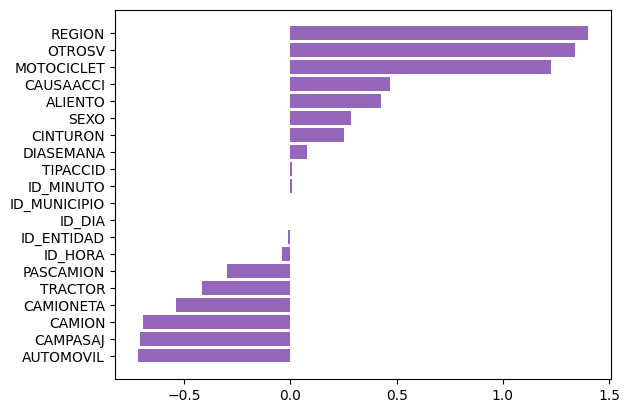

In [27]:
f_importances(svmtest.coef_[0], features_names)

In [ ]:
## Metricas Resultados

In [30]:
ypred = grid.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[50 19]
 [16 39]]


In [31]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        69
           1       0.67      0.71      0.69        55

    accuracy                           0.72       124
   macro avg       0.71      0.72      0.72       124
weighted avg       0.72      0.72      0.72       124



In [ ]:
## Modelo SVC con kernel gaussiano

In [32]:
svc_rbf = SVC()

param_grid = [
  {'C': [10**x for x in np.linspace(1,4,10)], 'gamma': [10**x for x in np.linspace(-3,-7,10)], 'kernel': ['rbf']}
 ]

In [33]:
grid_rbf = GridSearchCV(svc_rbf, param_grid)
grid_rbf.fit(xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10.0, 21.544346900318832, 46.41588833612777,
                                100.0, 215.44346900318823, 464.15888336127773,
                                1000.0, 2154.4346900318824, 4641.588833612777,
                                10000.0],
                          'gamma': [0.001, 0.00035938136638046257,
                                    0.0001291549665014884,
                                    4.641588833612782e-05,
                                    1.6681005372000593e-05,
                                    5.994842503189409e-06,
                                    2.1544346900318865e-06,
                                    7.742636826811278e-07,
                                    2.782559402207126e-07, 1e-07],
                          'kernel': ['rbf']}])

In [34]:
grid_rbf.best_params_

{'C': 10000.0, 'gamma': 1.6681005372000593e-05, 'kernel': 'rbf'}

In [ ]:
## Metricas Resultados

In [35]:
ypred = grid_rbf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[50 19]
 [21 34]]


In [36]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        69
           1       0.64      0.62      0.63        55

    accuracy                           0.68       124
   macro avg       0.67      0.67      0.67       124
weighted avg       0.68      0.68      0.68       124



In [ ]:
## Modelo SVC con kernel sigmoide

In [37]:
svc_s = SVC()

param_grid = [
  {'C': [1, 10, 100], 'gamma': [0.001, 0.000001, 0.0000001, 'auto'], 'kernel': ['sigmoid']}
 ]

In [38]:
grid_s = GridSearchCV(svc_s, param_grid)
grid_s.fit(xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.001, 1e-06, 1e-07, 'auto'],
                          'kernel': ['sigmoid']}])

In [39]:
grid_s.best_params_

{'C': 100, 'gamma': 1e-06, 'kernel': 'sigmoid'}

In [ ]:
## Metricas Resultados

In [40]:
ypred = grid_s.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[24 45]
 [ 6 49]]


In [41]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.35      0.48        69
           1       0.52      0.89      0.66        55

    accuracy                           0.59       124
   macro avg       0.66      0.62      0.57       124
weighted avg       0.68      0.59      0.56       124

